# Predicting Heart Disease using machine learning -  Classification Problem

Approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Defination

In a stateme,
> Given clinical paramenters about a patient, can we predict wether or not they have heart disease ?

## 2. Data
   We are using the Heart Disease Data Set - Machine Learning Repository version
   Cleaveland data .. More details on Kaggle : https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland

Create Data Dictionary.

## 3. Evaluation
> If we reach 95% accuracy at predicting wether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## Features -  Data Dictionary

  *  id (Unique id for each patient)
  *  age (Age of the patient in years)
  *  origin (place of study)
  *  sex (Male/Female)
  *  cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
  *  trestbpsresting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
  *  chol (serum cholesterol in mg/dl)
  *  fbs (if fasting blood sugar > 120 mg/dl)
  *  restecg (resting electrocardiographic results)
  *  -- Values: [normal, stt abnormality, lv hypertrophy]
  *  thalach: maximum heart rate achieved
  *  exang: exercise-induced angina (True/ False)
  *  oldpeak: ST depression induced by exercise relative to rest
  *  slope: the slope of the peak exercise ST segment
  *  ca: number of major vessels (0-3) colored by fluoroscopy
  *  thal: [normal; fixed defect; reversible defect]
  *  num: the predicted attribute


## Preparing the tools
We are going inport all the tools , pandas, Matplotlib for data analyses and manipulation

In [2]:
# Import all the tools we need.

# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as plt
import seaborn as sns
from fastapi.openapi.constants import METHODS_WITH_BODY

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,auc,accuracy_score,f1_score,precision_recall_curve
from sklearn.metrics import RocCurveDisplay


# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings

from sympy.printing.pretty.pretty_symbology import line_width

warnings.filterwarnings('ignore')



## Load Data


In [4]:
df =pd.read_csv('heart-disease.csv')
df.shape  # (rows and columns)

(303, 14)

In [ ]:
## Data Exploration
The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types:
3. Whats is missing frin the data abd how do you deal with it.
4. Where are the outliers andwhy sahoukd you care abit them.
5. How can you add, change or remove features to get more form the data


In [5]:
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Lets find out how many each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

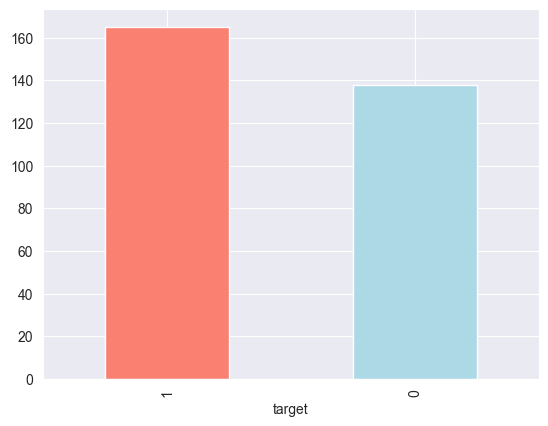

In [12]:
df["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"]);
1 -  heart disease
0 -  No heart disease

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
#Finding missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency According to Sex


In [18]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
# Compare target column wiht Sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


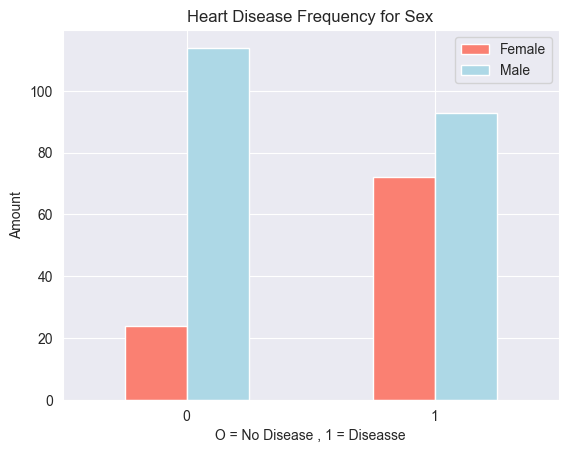

In [23]:
# Create a plot of Cross Tab
import matplotlib.pyplot as plt

pd.crosstab(df.target, df.sex).plot(kind='bar', color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("O = No Disease , 1 = Diseasse")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Age vrs MAx Heart Rate for Heart Disease

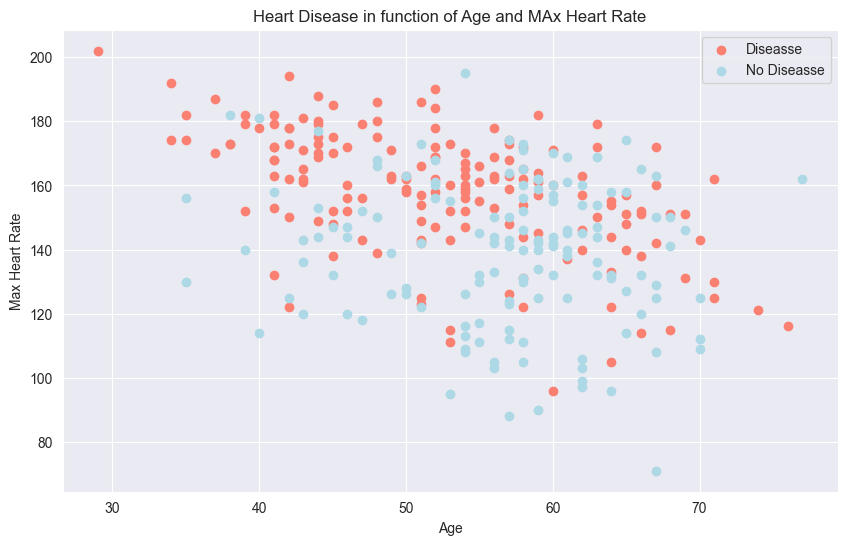

In [32]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target ==1],
            df.thalach[df.target ==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target ==0],
            c = "lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and MAx Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseasse","No Diseasse"]);


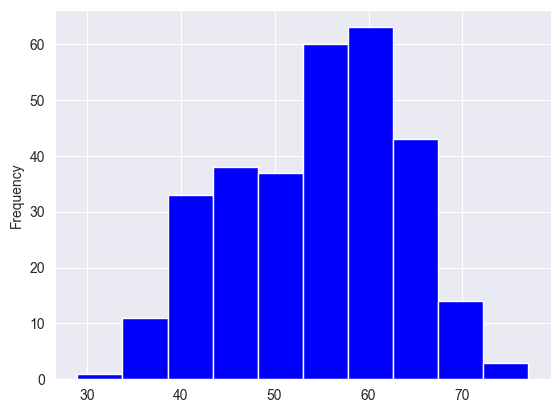

In [34]:
# Check distribution  of the age column with the histogram

df.age.plot(kind='hist', color=["blue"]);

## Heart Disease Frequesncy per Chest Pain Type

In [35]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


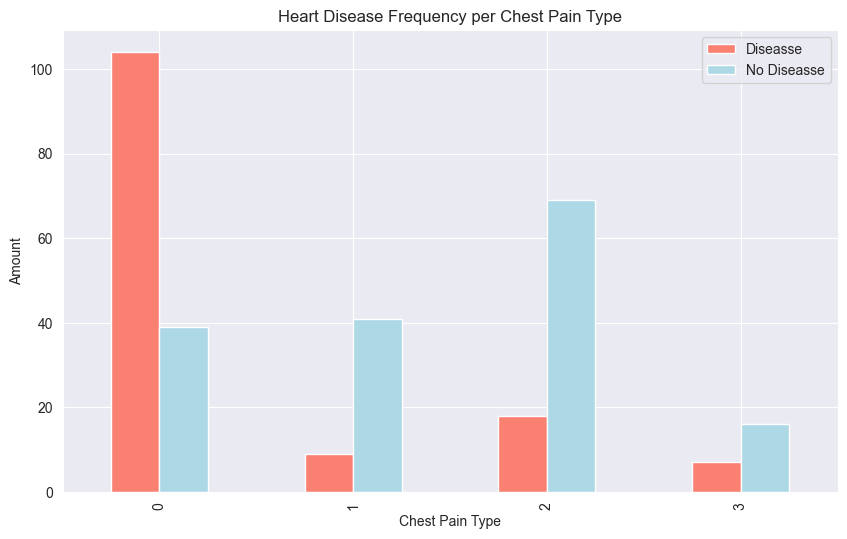

In [38]:
# Make crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   color=["salmon","lightblue"],
                                   figsize=(10,6)
                                   );
# Add some communication
plt.title ("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Diseasse","No Diseasse"]);


In [40]:
d = df.head()
d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Make a correlation matrx
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


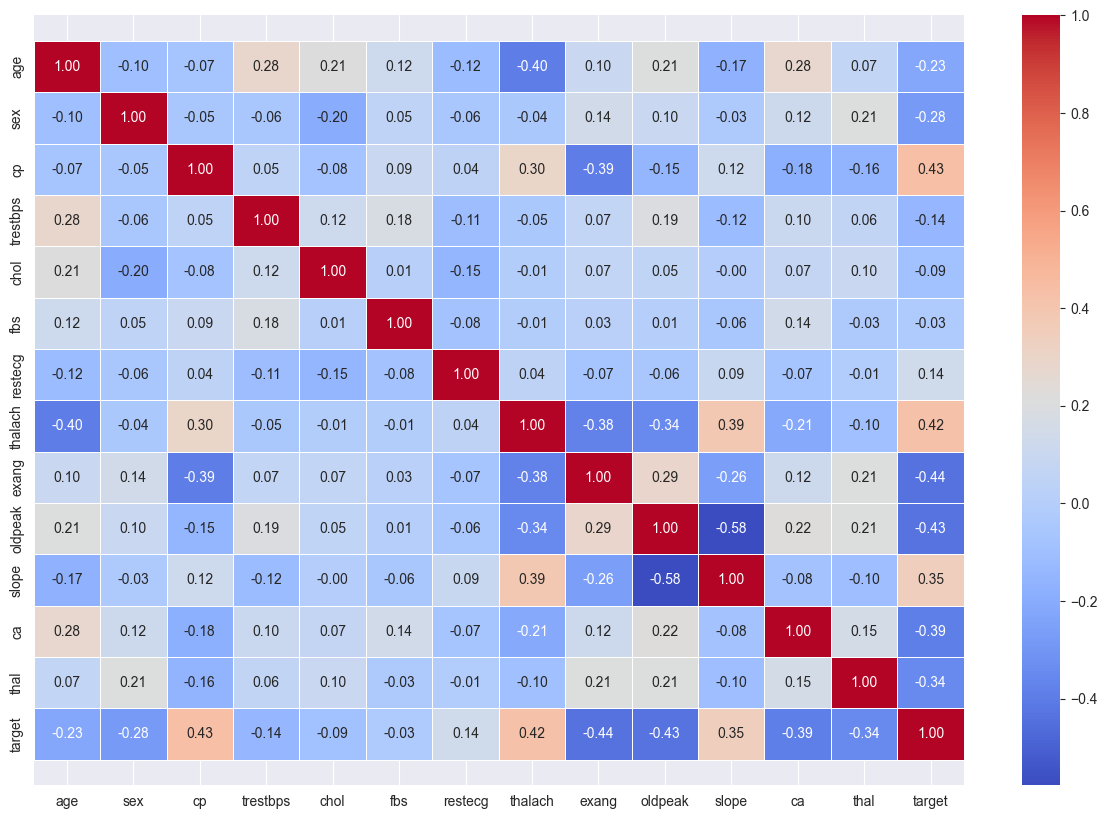

In [44]:
#Lets make our correlation matrix a little nice
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt=".2f",
                 cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5);

## 5. Modellng

In [64]:
d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Splitting data

x= df.drop("target",axis=1)
y= df["target"]

In [65]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [66]:
#Split data inot train and test sets
np.random.seed(42)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


In [67]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [68]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

After splitting data into training and test set.
Always refer to Machine Learning Map from SciKit Learn.

Our Challenge is a Classification Problem

We are using 3 different machine learning models
1. Logistic Regression
2. K - Nearest Neighhbour Classifier
3. RandomForrest Classifier

In [74]:
def fit_and_score(models , x_train , x_test , y_train , y_test):
    """
    Fits and evaluates multiple machine learning models on training and testing data.

    This function takes a list of machine learning models and processes each of them by fitting
    on the training data and evaluating on the test data. It ensures all models are applied to
    the same dataset and their performance can be examined.

    Parameters:
    models (list): A list of machine learning model instances.
    x_train: The feature set for training the models.
    x_test: The feature set for testing the models.
    y_train: The target values corresponding to x_train for training.
    y_test: The ground truth target values corresponding to x_test for evaluation.

    Returns:
    dict: A dictionary containing fitted models as keys and evaluation scores as
    their respective values.
    """
    # Set random seed
    np.random.seed ( 42 )

    # Make a dictionary to keep model scores
    model_scores = {'Logistic Regression': LogisticRegression(),
                    'K Nearest Neighbour': KNeighborsClassifier(),
                    'Random Forest': RandomForestClassifier()}

    # Loop through models
    for name , model in models.items ():
        # Fit the model to data
        model.fit ( x_train , y_train )
        # Evaluate the model and append its score to the model scores
        model_scores[name] = model.score ( x_test , y_test )

    # This return statement should be outside the for loop
    return model_scores

In [75]:
model_scores = fit_and_score(models = models ,
                          x_train = x_train,
                          x_test = x_test,
                          y_train = y_train,
                          y_test = y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'K Nearest Neighbour': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model COmparison


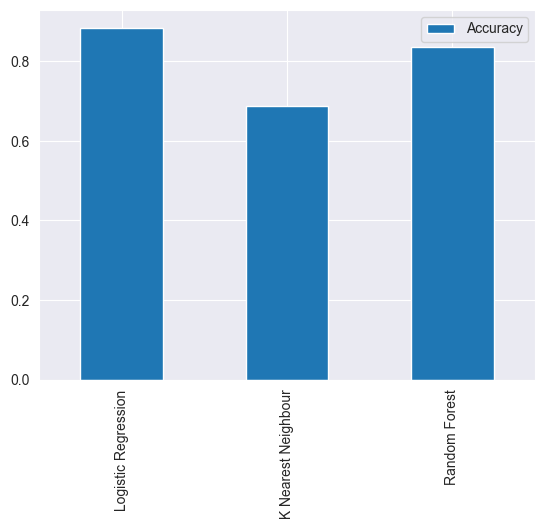

In [80]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.T.plot.bar();

This is the results of the base line model. THis model can be improved or further tune to give us more accurate results using features like hyper parameter.

Let us look at the following :  For Classification
* Hyperparameter Tuning
* Feature Importance
* COnfusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Cassisification Report
* ROC Curve
* Area under the curve ( AUC)

## Hyperparameter Tuning by Hand


In [83]:
# Lets tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range ( 1 , 21 )

# Setup KNN instance
knn = KNeighborsClassifier ()

# For Loop through different n_neighbors
for i in neighbours:
    knn.set_params ( n_neighbors = i )

    # Fit the algorithm
    knn.fit ( x_train , y_train )

    # Update the training scores list
    train_scores.append ( knn.score ( x_train , y_train ) )

    # Update the test score list
    test_scores.append ( knn.score ( x_test , y_test ) )

In [84]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [85]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41


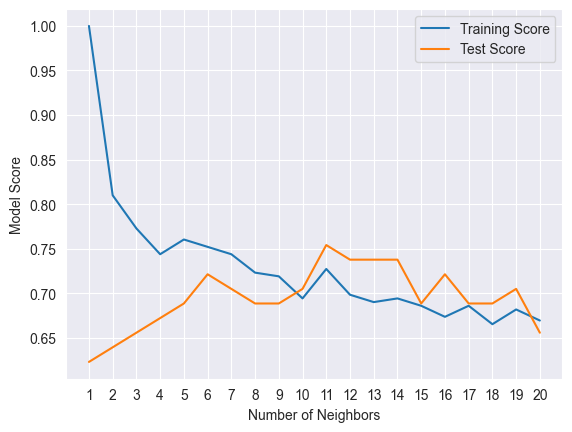

In [90]:
#Visualize the results

plt.plot ( neighbours , train_scores , label = "Training Score" )
plt.plot(neighbours , test_scores , label = "Test Score")
plt.xticks ( neighbours )
plt.xlabel ( "Number of Neighbors" )
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")


# Tunning th Hyperparameters with Randomised Searched CV

We are going to tune :
* Logistic Regression
* RandomForestClassifier
* ... using the Randomised SearchCV

In [115]:
# Create a hyperparameter grid for Logistist Regression
log_reg_param = {"C": np.logspace(-4,4,20),
                 "solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "criterion": ["gini","entropy"]
           }

After setting up the grid for hyper parameters for each models, we can proceed with tuning

In [116]:
np.random.seed(42)

#Setup randome hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_param,
                                cv = 5,
                                n_iter = 20,
                                verbose = 1)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [117]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Doing smae for RandomForestClassifier


In [118]:
# Setup randome seed
np.random.seed(42)

#Setup random hyperparameters search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = 1)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [119]:
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(17),
 'max_depth': 5,
 'criterion': 'gini'}

In [120]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [121]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K Nearest Neighbour': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Tunning methods for models
    1. By Hand
    2. Using RandomisedSearchCV
    3. GridSearchCV

## Hperparameter Tuning wit Grid Search CV

Since our Logistics Regresssion model provides the best scores so far, we'll try and improve them again using GridSearchCV


In [125]:
#Different Hyperparameter fro our LogisticRegression model
log_reg_grid = { "C": np.logspace(-4,4,30),
                 "solver": ["liblinear"]
                 }
#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=1)

#Fit grid hyperparameter searchh model

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=1)

In [128]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier , beyond accuracy
* ROC Curve and AUC
* Confusion Matric
* Classification
* Precision
* Recall
* F1 Score

and it we will use cross validation where possible.

To make comparasons and evaluate our trained modell, first we need to make predictions




In [129]:
##Make Predictions wiht the tuned model
y_pred = gs_log_reg.predict(x_test)

In [130]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [131]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

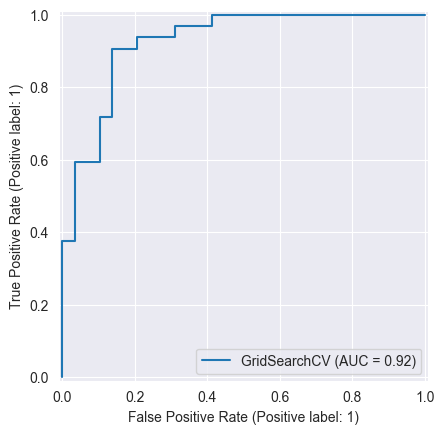

In [134]:
# Ploot ROC Curve and Calculate the AUC Curve
plot_roc_curve = RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [148]:
# Confusiion Matrix
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


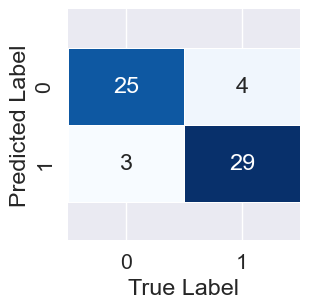

In [147]:
sns.set(font_scale=1.4)
def plot_conf_mat(y_test,y_pred):
    """
    Plots a confusion matrix for a given set of true and predicted values
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                annot=True,
                fmt="d",
                cbar=False,
                linewidths=0.5,
                cmap="Blues")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5,top - 0.5)

plot_conf_mat(y_test,y_pred)

Now we have a ROC curve and AUC metric . We have also run the Confusion Matrix. Lets get classification report
as well as cross validation precision , recall and F1 score.


In [149]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation Matricx using Cross Validation

We are going to calculate precision , recall and f1 score of our model using cross validation and to
do so we will b using cross_val_score()


In [153]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [157]:
#Create a new classifier with best parameter
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [160]:
# Cross-validate accuracy
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [161]:
np.mean(cv_accuracy)

np.float64(0.8479781420765027)

In [162]:
#Cross-Validation precision
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [163]:
# Cross validation for Recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


np.float64(0.9272727272727274)

In [167]:
#Cross Validation for F1 Score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

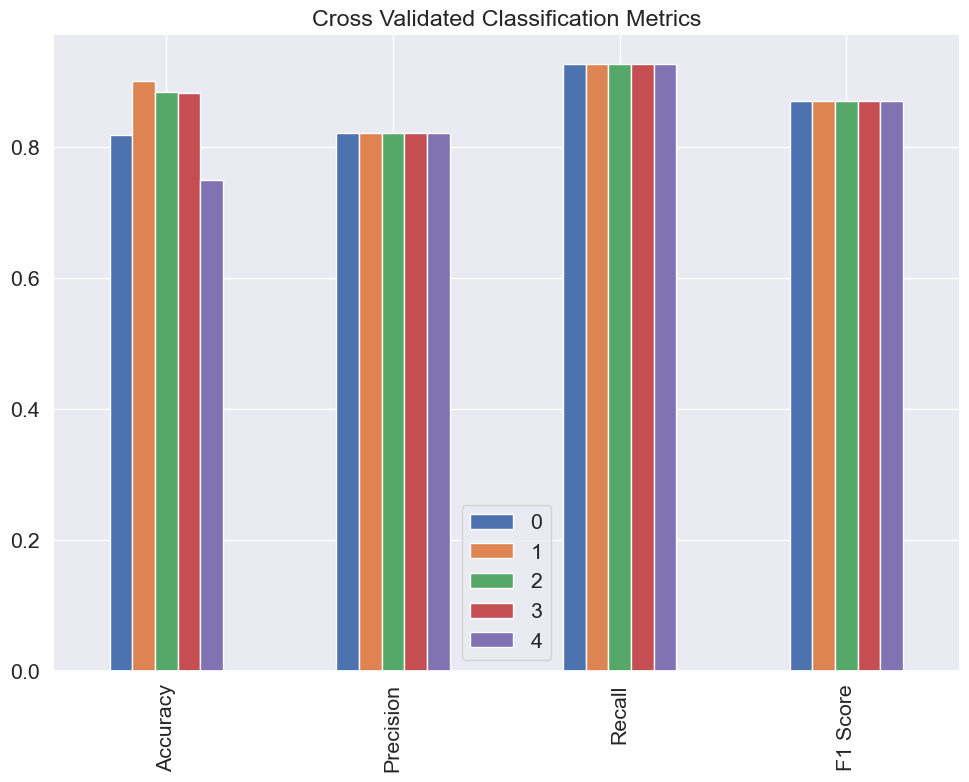

In [172]:
# Visializing all the metrics

cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1 Score":cv_f1})

cv_metrics.T.plot.bar(title = "Cross Validated Classification Metrics",
                      legend = 1);

## Feature Importance
### Feature Importance is another way of asking which features contributed most to the
outcomes oof the model and how did they contribute.

Finding feature importance is different for each machine learning

Find the feature Importance for the Logistic Model

In [174]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train);


In [175]:
#Check coeffiencient
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [179]:
# Matching coefs of features to coolumns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076873709286024),
 'sex': np.float64(-0.8606204735539111),
 'cp': np.float64(0.6600143086174385),
 'trestbps': np.float64(-0.01155970641957489),
 'chol': np.float64(-0.0016649609500147373),
 'fbs': np.float64(0.04017238940156104),
 'restecg': np.float64(0.3160340177157746),
 'thalach': np.float64(0.02458922261936637),
 'exang': np.float64(-0.6047017032281077),
 'oldpeak': np.float64(-0.567954572983317),
 'slope': np.float64(0.4508539117301764),
 'ca': np.float64(-0.6373332602422034),
 'thal': np.float64(-0.6755508982355707)}

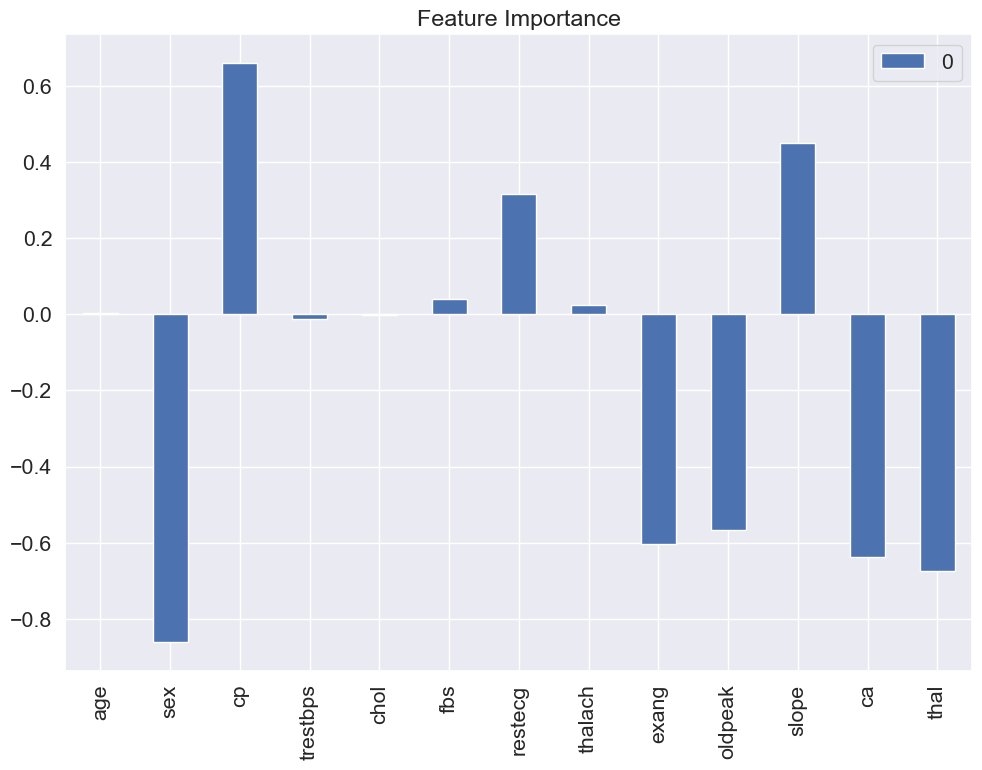

In [180]:
# Visualizing features importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=1);

## 6. Experiment .
Learn More about CatBoost or XGBoost
